In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv("train.csv")
df.shape
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [3]:
df2 = pd.read_csv("test.csv")
df2.shape

(2178, 9)

In [4]:
df.shape

(8708, 9)

In [5]:
#combining both datasets
frames = [df, df2]
result = pd.concat(frames)
result

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [6]:
result.shape

(10886, 9)

In [7]:
#unique value of each column
column_list = result.columns.values.tolist()
for column_name in column_list:
      print(result[column_name].unique())

['5/2/2012 19:00' '9/5/2012 4:00' '1/13/2011 9:00' ... '3/7/2012 22:00'
 '5/12/2011 5:00' '7/18/2012 16:00']
['Summer' 'Fall' 'Spring' 'Winter']
[0 1]
[1 0]
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']
[22.14 28.7   5.74 13.94 30.34 33.62 24.6  21.32 27.06 12.3  18.04 18.86
 25.42 13.12 22.96 26.24 17.22 27.88 36.9  29.52 31.16 10.66 31.98 15.58
  6.56 19.68 16.4  14.76  9.02 32.8  11.48 20.5   9.84  8.2   7.38 23.78
 35.26 37.72  3.28  4.1  36.08  1.64  4.92 34.44  0.82  2.46 38.54 39.36
 41.  ]
[25.76  33.335  6.06  16.665 12.12  29.545 25.    31.06  15.15  21.97
 22.725 30.305 26.515 21.21  31.82  39.395 34.85  35.605 18.18  19.695
 36.365  8.335 32.575 23.485 20.455 34.09  17.425 11.365 14.395 24.24
 13.635 12.88  28.79  15.91   7.575 18.94  37.12  10.605 37.88   9.09
 27.275 40.91  42.425 38.635 28.03   5.305  9.85   3.79   6.82  40.15
  1.515 41.665 43.94   3.03  43.18   4.545  0.76   2.275 44.695 45.455]
[ 77  79  50  29  51 

In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 850.5+ KB


# Preprocessing

In [9]:
#Separating date and time
result['Dates'] = pd.to_datetime(result['datetime']).dt.date
result['Time'] = pd.to_datetime(result['datetime']).dt.time
result

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012-05-02,19:00:00
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012-09-05,04:00:00
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011-01-13,09:00:00
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011-11-18,16:00:00
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,2012-03-08,03:00:00
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,2012-01-12,12:00:00
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,2012-03-07,22:00:00
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,2011-05-12,05:00:00


In [10]:
df3 = result
df3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012-05-02,19:00:00
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012-09-05,04:00:00
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011-01-13,09:00:00
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011-11-18,16:00:00
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,2012-03-08,03:00:00
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,2012-01-12,12:00:00
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,2012-03-07,22:00:00
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,2011-05-12,05:00:00


In [11]:
#dropping datetime
df3.drop("datetime", axis=1, inplace=True)
df3

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012-05-02,19:00:00
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012-09-05,04:00:00
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011-01-13,09:00:00
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011-11-18,16:00:00
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,2012-03-08,03:00:00
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,2012-01-12,12:00:00
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,2012-03-07,22:00:00
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,2011-05-12,05:00:00


In [12]:
df4 = df3
df4

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012-05-02,19:00:00
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012-09-05,04:00:00
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011-01-13,09:00:00
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011-11-18,16:00:00
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,2012-03-08,03:00:00
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,2012-01-12,12:00:00
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,2012-03-07,22:00:00
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,2011-05-12,05:00:00


In [13]:
#label encoding of weather and season
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df4['weather'])
le_weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df4['weather'] = le.transform(df4['weather'])
print(le_weather_mapping)
df4

{' Clear + Few clouds': 0, ' Heavy Rain + Thunderstorm ': 1, ' Light Snow, Light Rain': 2, ' Mist + Cloudy ': 3}


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,Summer,0,1,0,22.14,25.760,77,16.9979,2012-05-02,19:00:00
1,Fall,0,1,0,28.70,33.335,79,19.0012,2012-09-05,04:00:00
2,Spring,0,1,0,5.74,6.060,50,22.0028,2011-01-13,09:00:00
3,Winter,0,1,0,13.94,16.665,29,8.9981,2011-11-18,16:00:00
4,Fall,0,1,0,30.34,33.335,51,19.0012,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,0,18.86,22.725,63,26.0027,2012-03-08,03:00:00
2174,Spring,0,1,3,13.94,17.425,81,7.0015,2012-01-12,12:00:00
2175,Spring,0,1,0,18.86,22.725,59,19.9995,2012-03-07,22:00:00
2176,Summer,0,1,0,17.22,21.210,94,8.9981,2011-05-12,05:00:00


In [14]:
le.fit(df4['season'])
le_weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df4['season'] = le.transform(df4['season'])
print(le_weather_mapping)
df4

{'Fall': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,2,0,1,0,22.14,25.760,77,16.9979,2012-05-02,19:00:00
1,0,0,1,0,28.70,33.335,79,19.0012,2012-09-05,04:00:00
2,1,0,1,0,5.74,6.060,50,22.0028,2011-01-13,09:00:00
3,3,0,1,0,13.94,16.665,29,8.9981,2011-11-18,16:00:00
4,0,0,1,0,30.34,33.335,51,19.0012,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,2012-03-08,03:00:00
2174,1,0,1,3,13.94,17.425,81,7.0015,2012-01-12,12:00:00
2175,1,0,1,0,18.86,22.725,59,19.9995,2012-03-07,22:00:00
2176,2,0,1,0,17.22,21.210,94,8.9981,2011-05-12,05:00:00


In [15]:
#converting date to int
df4["Dates"] = pd.to_datetime(df4["Dates"]).dt.strftime("%Y%m%d")
df4

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,2,0,1,0,22.14,25.760,77,16.9979,20120502,19:00:00
1,0,0,1,0,28.70,33.335,79,19.0012,20120905,04:00:00
2,1,0,1,0,5.74,6.060,50,22.0028,20110113,09:00:00
3,3,0,1,0,13.94,16.665,29,8.9981,20111118,16:00:00
4,0,0,1,0,30.34,33.335,51,19.0012,20110913,13:00:00
...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,20120308,03:00:00
2174,1,0,1,3,13.94,17.425,81,7.0015,20120112,12:00:00
2175,1,0,1,0,18.86,22.725,59,19.9995,20120307,22:00:00
2176,2,0,1,0,17.22,21.210,94,8.9981,20110512,05:00:00


In [16]:
#combining both datasets
frames = [df, df2]
result = pd.concat(frames)
result

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [17]:
#converting time to int
df4["Time"] = pd.to_datetime(result["datetime"]).dt.strftime("%H")
df4

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Dates,Time
0,2,0,1,0,22.14,25.760,77,16.9979,20120502,19
1,0,0,1,0,28.70,33.335,79,19.0012,20120905,04
2,1,0,1,0,5.74,6.060,50,22.0028,20110113,09
3,3,0,1,0,13.94,16.665,29,8.9981,20111118,16
4,0,0,1,0,30.34,33.335,51,19.0012,20110913,13
...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,20120308,03
2174,1,0,1,3,13.94,17.425,81,7.0015,20120112,12
2175,1,0,1,0,18.86,22.725,59,19.9995,20120307,22
2176,2,0,1,0,17.22,21.210,94,8.9981,20110512,05


In [37]:
#since month and year makes more sense then date 
#extracting month and year from date
df4["Month"] = pd.to_datetime(result["datetime"]).dt.strftime("%m")
df4["Year"] = pd.to_datetime(result["datetime"]).dt.strftime("%Y")
df4

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Time,Month,Year
0,2,0,1,0,22.14,25.760,77,16.9979,19,05,2012
1,0,0,1,0,28.70,33.335,79,19.0012,04,09,2012
2,1,0,1,0,5.74,6.060,50,22.0028,09,01,2011
3,3,0,1,0,13.94,16.665,29,8.9981,16,11,2011
4,0,0,1,0,30.34,33.335,51,19.0012,13,09,2011
...,...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,03,03,2012
2174,1,0,1,3,13.94,17.425,81,7.0015,12,01,2012
2175,1,0,1,0,18.86,22.725,59,19.9995,22,03,2012
2176,2,0,1,0,17.22,21.210,94,8.9981,05,05,2011


In [69]:
df4['Year'] = df4['Year']/2000
df4

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Time,Month,Year,cluster_num
0,2,0,1,0,22.14,25.760,77,16.9979,19,5,0.000503,1
1,0,0,1,0,28.70,33.335,79,19.0012,4,9,0.000503,1
2,1,0,1,0,5.74,6.060,50,22.0028,9,1,0.000503,2
3,3,0,1,0,13.94,16.665,29,8.9981,16,11,0.000503,2
4,0,0,1,0,30.34,33.335,51,19.0012,13,9,0.000503,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,3,3,0.000503,2
2174,1,0,1,3,13.94,17.425,81,7.0015,12,1,0.000503,1
2175,1,0,1,0,18.86,22.725,59,19.9995,22,3,0.000503,2
2176,2,0,1,0,17.22,21.210,94,8.9981,5,5,0.000503,1


In [70]:
df5 = df4

In [71]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int32  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int32  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   Time         10886 non-null  int64  
 9   Month        10886 non-null  int64  
 10  Year         10886 non-null  float64
 11  cluster_num  10886 non-null  int32  
dtypes: float64(4), int32(3), int64(5)
memory usage: 978.0 KB


In [72]:
df5['Time'] = pd.to_numeric(df5['Time'])
df5['Month'] = pd.to_numeric(df5['Month'])
df5['Year'] = pd.to_numeric(df5['Year'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int32  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int32  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   Time         10886 non-null  int64  
 9   Month        10886 non-null  int64  
 10  Year         10886 non-null  float64
 11  cluster_num  10886 non-null  int32  
dtypes: float64(4), int32(3), int64(5)
memory usage: 978.0 KB


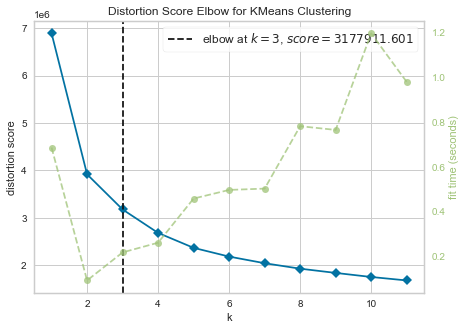

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df5)
visualizer.show()

In [74]:
# K-means clustering 

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df3)
df3['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 1 0 ... 0 1 2]
3177911.601267025
12
[[1.74734043e+00 3.15824468e-02 6.75199468e-01 6.09375000e-01
  1.33176396e+01 1.58699867e+01 4.55571809e+01 1.66226287e+01
  1.25728059e+01 5.13364362e+00 5.02881400e-04 2.00000000e+00]
 [1.58434221e+00 2.96610169e-02 6.69491525e-01 1.34059726e+00
  1.96492252e+01 2.31972821e+01 7.94644875e+01 1.02237255e+01
  9.39366425e+00 7.13438257e+00 5.02866778e-04 1.00000000e+00]
 [1.11088296e+00 2.36139630e-02 7.06023272e-01 5.96851472e-01
  2.83340589e+01 3.24457888e+01 4.88822724e+01 1.32322271e+01
  1.41232033e+01 6.91067762e+00 5.02884155e-04 8.21565038e-15]]


In [75]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 4956, 0: 3008, 2: 2922})

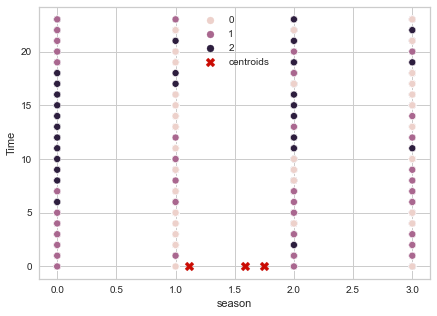

In [76]:
#Visulazing clusters
sns.scatterplot(data=df5, x="season", y="Time", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

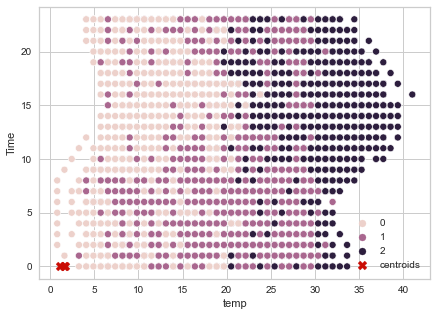

In [77]:
#Visulazing clusters
sns.scatterplot(data=df5, x="temp", y="Time", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

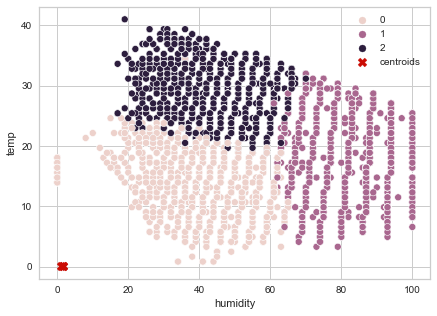

In [78]:
#Visulazing clusters
sns.scatterplot(data=df5, x="humidity", y="temp", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [79]:
result.to_csv("combined_data")
df5.to_csv("cleaned_data")

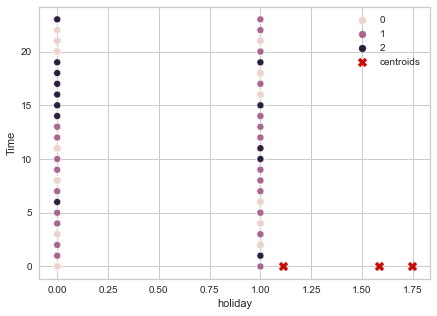

In [80]:
#Visulazing clusters
sns.scatterplot(data=df5, x="holiday", y="Time", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

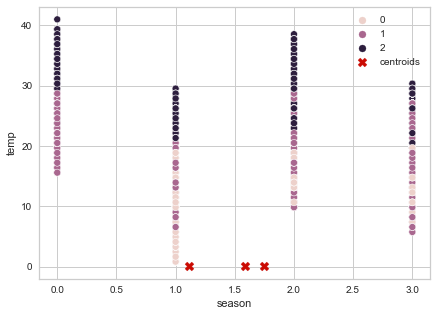

In [81]:
#Visulazing clusters
sns.scatterplot(data=df5, x="season", y="temp", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

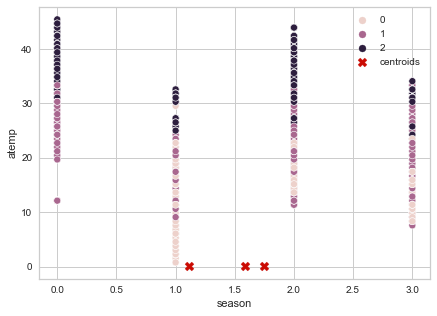

In [82]:
#Visulazing clusters
sns.scatterplot(data=df5, x="season", y="atemp", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

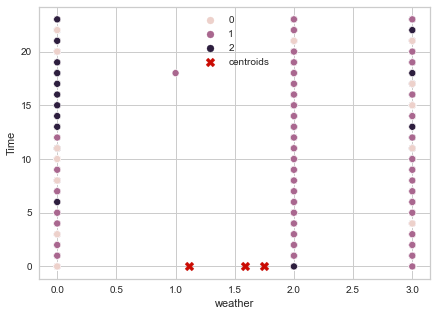

In [83]:
#Visulazing clusters
sns.scatterplot(data=df5, x="weather", y="Time", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

# Describing Segments

In [84]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df5['cluster_num'],df5['season'])
#Reordering cols
crosstab = crosstab[[0,1,2,3]]
crosstab

season,0,1,2,3
cluster_num,,,,
0,17,1651,415,925
1,1331,888,1247,1490
2,1385,147,1071,319


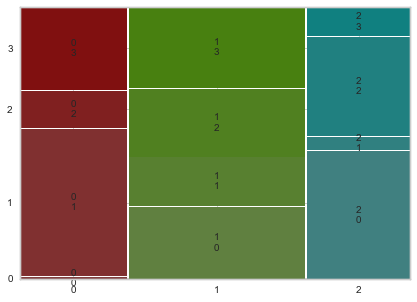

In [85]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [86]:
crosstab1 =pd.crosstab(df5['cluster_num'],df5['weather'])
#Reordering cols
crosstab1 = crosstab1[[0,1,2,3]]
crosstab1

weather,0,1,2,3
cluster_num,,,,
0,2376,0,63,569
1,2493,1,743,1719
2,2323,0,53,546


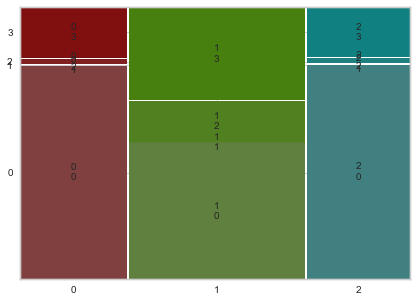

In [87]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab1.stack())
plt.show()

In [88]:
crosstab2 =pd.crosstab(df5['cluster_num'],df5['Time'])
#Reordering cols
crosstab2 = crosstab2[[0,1,2,3,4,5,6,7]]
crosstab2

Time,0,1,2,3,4,5,6,7
cluster_num,,,,,,,,
0,109,101,93,82,77,92,89,94
1,282,296,312,318,339,337,340,323
2,64,57,43,33,26,23,26,38


In [89]:
crosstab3 =pd.crosstab(df5['cluster_num'],df5['Time'])
#Reordering cols
crosstab3 = crosstab3[[8,9,10,11,12,13,14,15]]
crosstab3

Time,8,9,10,11,12,13,14,15
cluster_num,,,,,,,,
0,103,126,135,145,157,156,155,152
1,283,223,182,135,105,86,80,80
2,69,106,138,175,194,214,221,224


In [90]:
crosstab4 =pd.crosstab(df5['cluster_num'],df5['Time'])
#Reordering cols
crosstab4 = crosstab4[[16,17,18,19,20,21,22,23]]
crosstab4

Time,16,17,18,19,20,21,22,23
cluster_num,,,,,,,,
0,156,148,156,150,148,136,129,119
1,83,95,110,139,161,194,212,241
2,217,213,190,167,147,126,115,96


<AxesSubplot:xlabel='cluster_num', ylabel='Time'>

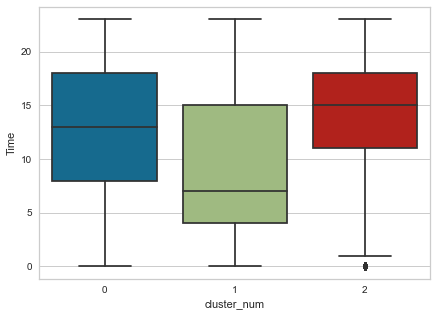

In [91]:
#box plot for age

sns.boxplot(x="cluster_num", y="Time", data=df5)